# **Exploratory Data Analysis for Movie Rating Dataset**

We first import the pandas and numpy function to run the code.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Next, we connect the colab to the drive to retrieve the dataset.

In [ ]:
# Connecting GDrive with Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Then, we import the dataset to the colab.

In [ ]:
# import library os so it can interact with file system that is in Google Colab operating system
import os

os.chdir("/content/drive/My Drive/Datasets/Movielens_1M/ml-1m")

Done importing, now we define the columns for each dataset. As for the final dataset, we put encoding='latin-1' to specify the correct encoding while we decode a byte object in `mnames`. This section follows the code from the O'Reilly book.

In [ ]:
#importing the dataset
unames = ["user_id", "gender", "age", "occupation", "zip"]
users = pd.read_table("users.dat", sep="::",
                      header=None, names=unames, engine="python")

rnames = ["user_id", "movie_id", "rating", "timestamp"]
ratings = pd.read_table("ratings.dat", sep="::",
                        header=None, names=rnames, engine="python")

mnames = ["movie_id", "title", "genres"]
movies = pd.read_table("movies.dat", sep="::", encoding='latin-1',
                       header=None, names=mnames, engine="python")

Then, we show each dataset with first 5 data.

In [ ]:
users.head(5)

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [ ]:
ratings.head(5)

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [ ]:
movies.head(5)

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


Then, we merge the datasets resulting the table below.

In [ ]:
data = pd.merge(pd.merge(ratings, users), movies)
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


## Mean Rating:

We first want to know the mean of movie ratings for the first 10 films grouped by gender. To do that, we can use the method below, which is `pivot_table` method.

In [ ]:
mean_ratings = data.pivot_table("rating", index="title", columns="gender", aggfunc="mean")
mean_ratings.head(10)

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
1-900 (1994),2.000000,3.000000
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215


From here, we can see that the mean ratings for the $1,000,000 Duck (1971) and 101 Dalmatians (1996) in average is mediocre since the female users give 3 and the male users give 2. As for the 1-900(1994), it is the opposite, the female users give 2 while the male users give 3. For the rest of the movies shown, both genders agree with the ratings they give because the main numbers are all the same.

Then, we want to visualize them. Before we visualize them, we shall make a new table. Here, we add `rating` column to the `movies` table.


Then, we plot out the first 10 movies we want to visualize the ratings.

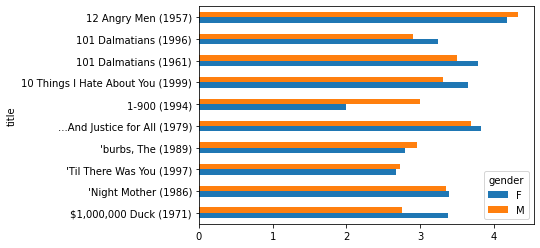

In [ ]:
mean_ratings.head(10).plot(kind = 'barh')

The result shows that average male users(orange bar) gives rating around 2.8 to 4.3. As for female users(blue bar), averagely they give 2.0 to 4.2. This inteprets that both male and female users are objective in giving solid opinion about movies. Males also appreciate movies from because they give higher ratings than females do. The highest movie rated is 12 Angry Men (1957) held by male users with 4.3 rating and the lowest is 1-900(1994) held by female users with 2.0 rating.

From the dataset above, this results in another dataframe called `mean_ratings` with titles as row and genders as column. Now, we want to find movies with ratings that has received at least 250 reviews. First, we use `groupby() ` to group the title and `size()` to get a Series of group sizes for each title.

In [ ]:
ratings_by_title = data.groupby("title").size()
ratings_by_title

title
$1,000,000 Duck (1971)                         37
'Night Mother (1986)                           70
'Til There Was You (1997)                      52
'burbs, The (1989)                            303
...And Justice for All (1979)                 199
                                             ... 
Zed & Two Noughts, A (1985)                    29
Zero Effect (1998)                            301
Zero Kelvin (Kjærlighetens kjøtere) (1995)      2
Zeus and Roxanne (1997)                        23
eXistenZ (1999)                               410
Length: 3706, dtype: int64

After that, we can group the data by the index to align the list. Then, we group it to more or equal to 250 and print them out.

In [ ]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

Now, we select rows from the dataset using `.loc` to show the ratings by gender to the grouped movies. The data will be shown in table but with movies with ratings more or equal to 250 for first 10 data only.

In [ ]:
mean_ratings1 = mean_ratings.loc[active_titles]
mean_ratings1.head(10)

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
"13th Warrior, The (1999)",3.112000,3.168000
2 Days in the Valley (1996),3.488889,3.244813
"20,000 Leagues Under the Sea (1954)",3.670103,3.709205
2001: A Space Odyssey (1968),3.825581,4.129738


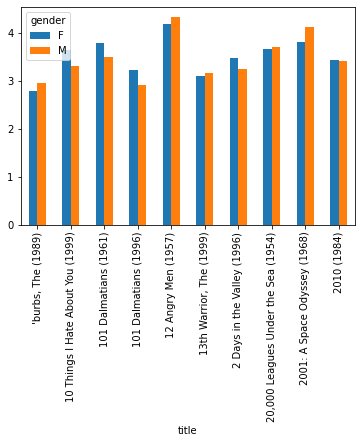

In [ ]:
mean_ratings1.head(10).plot(kind = 'bar')

From here, we can see that females hold the position which appreciate movies more because the blue bar that represents female users tend to stay above the orange bar which represents male users in giving ratings. Nevertheless, the highest rating of the movie is held by male user in 12 Angry Men (1957) with rating 4.3 and the lowest is held by female user in The 'burbs (1989) with 2.7 rating.

### Top rated movies by gender

Now, we want to see the list of top rated movies according to each gender using the new dataset of 250 ratings. Let us start off by female users. Here, we are using `sort_values()` and classify "F" and ascending it False so that the highest number is on top.

In [ ]:
top_female_ratings = mean_ratings1.sort_values("F", ascending=False)
top_female_ratings.head()

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415


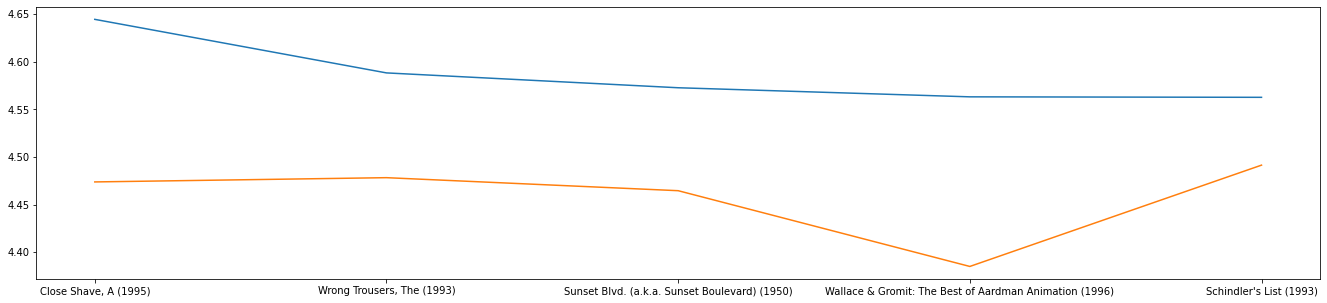

In [ ]:
plt.figure(figsize=(23, 5))
display(plt.plot(top_female_ratings.head()))

For now, we can focus on the blue line. We can see that A Close Shave(1995) holds the highest score which is 4.64 showing it is the movie with the highest rating among others.


As for the male users, we use the same code, but only we change the "F" to "M".

In [ ]:
top_male_ratings = mean_ratings1.sort_values("M", ascending=False)
top_male_ratings.head()

gender,F,M
title,,
"Godfather, The (1972)",4.314700,4.583333
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.481132,4.576628
"Shawshank Redemption, The (1994)",4.539075,4.560625
Raiders of the Lost Ark (1981),4.332168,4.520597
"Usual Suspects, The (1995)",4.513317,4.518248


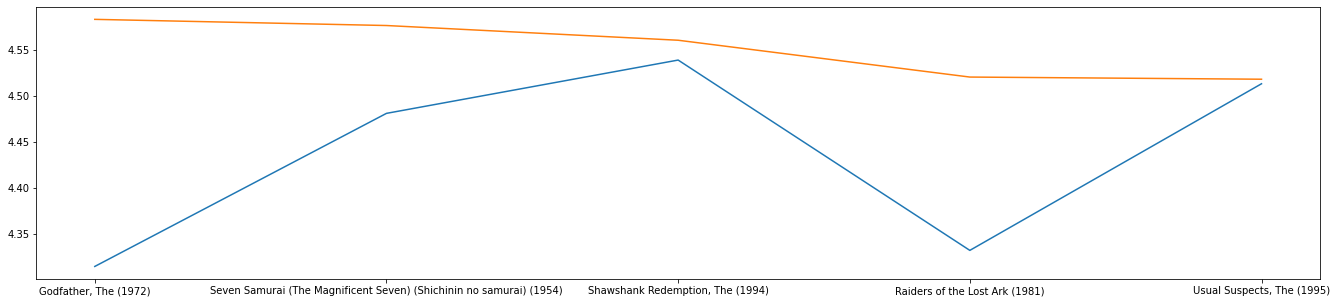

In [ ]:
plt.figure(figsize=(23, 5))
display(plt.plot(top_male_ratings.head()))

Now, we focus on the orange line. It shows that The Godfather (1972) holds the highest rating among male users among others with the score 4.58.



### Measuring rating disagreement

Now, we want to find the movies that are the most divisive between male and female viewers. We can add a column mean_ratings1 containing the difference in means and sort by it. We use diff to show the values so we can see the movies that are preferred by one gender, female in this case.

In [ ]:
mean_ratings1["diff"] = mean_ratings1["M"] - mean_ratings1["F"]

In [ ]:
sorted_by_diff = mean_ratings1.sort_values("diff")
sorted_by_diff.head()

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777


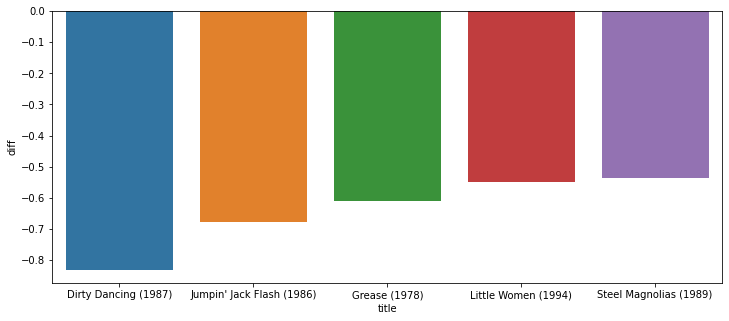

In [ ]:
plt.figure(figsize=(12, 5))
sns.barplot(x=sorted_by_diff.head().index, y=sorted_by_diff.head()['diff'])

From here, we see that the movie Dirty Dancing(1987) is the most preferred by females seen from the difference that is -0.83.

Now, we want to see the data for the males, the preferred movie in males. We can do this by reversing reversing the order of the rows and again slicing off the top 10 rows.

In [ ]:
sorted_by_diff[::-1].head()

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787


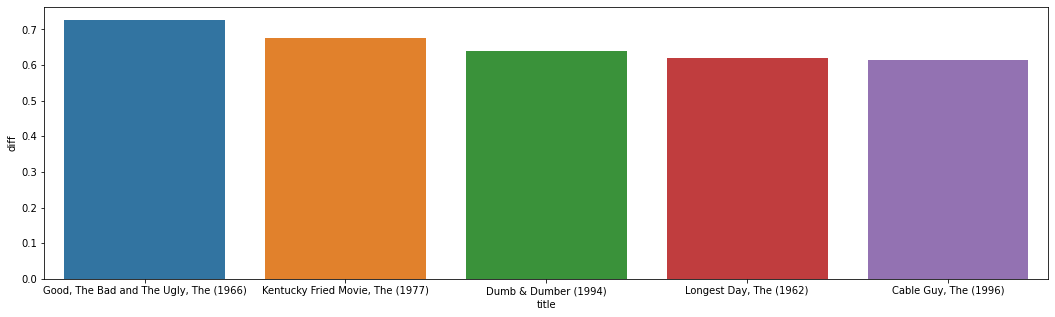

In [ ]:
plt.figure(figsize=(18, 5))
sns.barplot(x=sorted_by_diff[::-1].head().index, y=sorted_by_diff[::-1].head()['diff'])

It is shown that The Good, The Bad, and The Ugly (1966) is the most preffered by males among others with difference of 0.72.

Now, we want to know the movies that elicited the most disagreement among viewers, despite the gender identification. A way to measure disagreement is using variance or standart deviation. Here, we are using standart deviation of the ratings. To get this, we shall first compute the rating standard deviation by title and then filter down to the active titles.

In [ ]:
rating_std_by_title = data.groupby("title")["rating"].std()
rating_std_by_title = rating_std_by_title.loc[active_titles]
rating_std_by_title.head()

title
'burbs, The (1989)                   1.107760
10 Things I Hate About You (1999)    0.989815
101 Dalmatians (1961)                0.982103
101 Dalmatians (1996)                1.098717
12 Angry Men (1957)                  0.812731
Name: rating, dtype: float64

Done gettinf the standart deviation, we now sort them in descending order and select the first 6 rows, which are roughly the 6 most divisively rated movies.

In [ ]:
rating_std_by_title.sort_values(ascending=False)[:6]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Name: rating, dtype: float64

From here, we see that Dumb & Dumber (1994) elicited the most disagreement among viewers seen from the standart deviation being the highest, followed by The Blair Witch Project (1999).

## Movies Dataset Comparison

The dataset shows that a movie can consist of multiple genres. In order to separate each genre, they are given a pipe-separated (|) string.
To help us group the ratings data by genre, we can use the explode method on DataFrame. To do this, we can first split the genres string into a list of genres using the `str.split` method on the Series:

In [ ]:
movies["genres"].head()

0     Animation|Children's|Comedy
1    Adventure|Children's|Fantasy
2                  Comedy|Romance
3                    Comedy|Drama
4                          Comedy
Name: genres, dtype: object

In [ ]:
movies["genres"].head().str.split("|")

0     [Animation, Children's, Comedy]
1    [Adventure, Children's, Fantasy]
2                   [Comedy, Romance]
3                     [Comedy, Drama]
4                            [Comedy]
Name: genres, dtype: object

In [ ]:
movies["genre"] = movies.pop("genres").str.split("|")
movies.head()

,movie_id,title,genre
0,1,Toy Story (1995),"[Animation, Children's, Comedy]"
1,2,Jumanji (1995),"[Adventure, Children's, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama]"
4,5,Father of the Bride Part II (1995),[Comedy]


Since the pipes are gone and already able to be put in a table, now we create a new DataFrame called movies.explode("genre") to put the genre in each row for each "inner" element in each list of movie genres. For example, if a movie is classified as both a Animation and a Comedy, then there will be two rows in the result, one with just "Animation" and the other with just "Comedy". The result is as below.

In [ ]:
movies_exploded = movies.explode("genre")
movies_exploded[:10]

,movie_id,title,genre
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children's
0,1,Toy Story (1995),Comedy
1,2,Jumanji (1995),Adventure
1,2,Jumanji (1995),Children's
1,2,Jumanji (1995),Fantasy
2,3,Grumpier Old Men (1995),Comedy
2,3,Grumpier Old Men (1995),Romance
3,4,Waiting to Exhale (1995),Comedy
3,4,Waiting to Exhale (1995),Drama


Now, we can merge all three tables together and group by genre:

In [ ]:
ratings_with_genre = pd.merge(pd.merge(movies_exploded, ratings), users)
ratings_with_genre.head(8)

,movie_id,title,genre,user_id,rating,timestamp,gender,age,occupation,zip
0,1,Toy Story (1995),Animation,1,5,978824268,F,1,10,48067
1,1,Toy Story (1995),Children's,1,5,978824268,F,1,10,48067
2,1,Toy Story (1995),Comedy,1,5,978824268,F,1,10,48067
3,48,Pocahontas (1995),Animation,1,5,978824351,F,1,10,48067
4,48,Pocahontas (1995),Children's,1,5,978824351,F,1,10,48067
5,48,Pocahontas (1995),Musical,1,5,978824351,F,1,10,48067
6,48,Pocahontas (1995),Romance,1,5,978824351,F,1,10,48067
7,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067


To find each movie's information, we can use `.iloc[number of index]`. For example, we want to know the movie from index 3, we can write `.iloc[3]` after the dataset name. The example is per below.

In [ ]:
ratings_with_genre.iloc[3]

movie_id                     48
title         Pocahontas (1995)
genre                 Animation
user_id                       1
rating                        5
timestamp             978824351
gender                        F
age                           1
occupation                   10
zip                       48067
Name: 3, dtype: object

Then, we want to know the movie ratings from each genre done by people grouped in certain ages shown. We can group them using groupby() to genre and age with mean rating as for the numbers shown in the DataFrame. We then can unstack the age to see the age that give each ratings. The first 10 data is shown below.

In [ ]:
genre_ratings = (ratings_with_genre.groupby(["genre", "age"])["rating"].mean().unstack("age"))
genre_ratings[:10]

age,1,18,25,35,45,50,56
genre,,,,,,,
Action,3.506385,3.447097,3.453358,3.538107,3.528543,3.611333,3.610709
Adventure,3.449975,3.408525,3.443163,3.515291,3.528963,3.628163,3.649064
Animation,3.476113,3.624014,3.701228,3.740545,3.734856,3.780020,3.756233
Children's,3.241642,3.294257,3.426873,3.518423,3.527593,3.556555,3.621822
Comedy,3.497491,3.460417,3.490385,3.561984,3.591789,3.646868,3.650949
Crime,3.710170,3.668054,3.680321,3.733736,3.750661,3.810688,3.832549
Documentary,3.730769,3.865865,3.946690,3.953747,3.966521,3.908108,3.961538
Drama,3.794735,3.721930,3.726428,3.782512,3.784356,3.878415,3.933465
Fantasy,3.317647,3.353778,3.452484,3.482301,3.532468,3.581570,3.532700


At first, we were not sure about the first age which is 1. So, we made sure by using unique() value to interpret the ages which are displayed.

In [ ]:
ages = ratings_with_genre.age.unique()
ages

array([ 1, 50, 25, 35, 18, 45, 56])

So, the array confirms the ages shown which clearly indicates the number mistake is from the dataset itself. So, let's just get on to visualization.

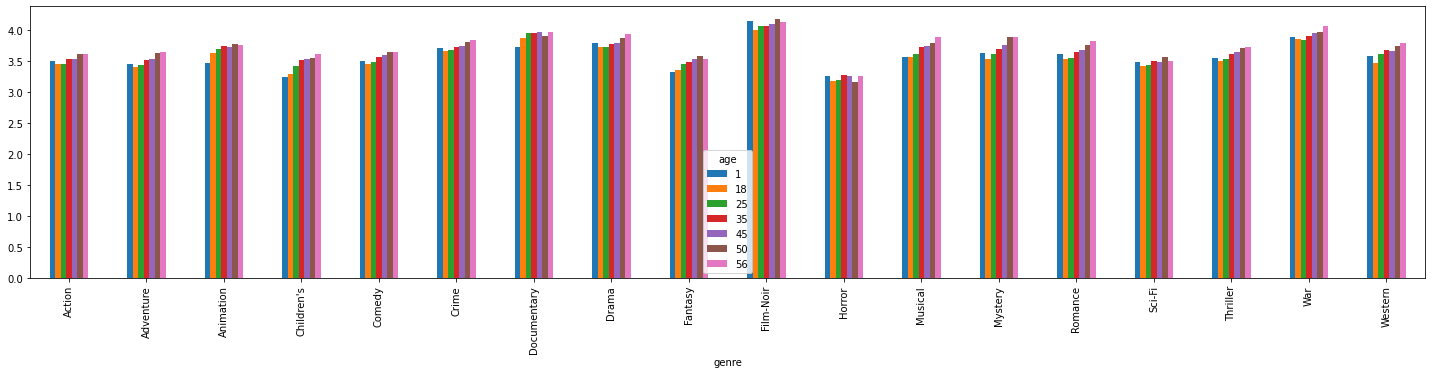

In [ ]:
genre_ratings.plot(figsize=(25,5),kind = 'bar')

Here are the ages that give rating to each genre. The differences from each age are not that significant in each genre of the plot. However, we can still interpret that Horror receives the lowest rating and Film-Noir receives the highest rating from the users. It shows that Film-Noir has the most liked genre among all those genres seen from ages.

We have analyze the movie ratings from each genre by ages. Now, we want to know from each gender. Firstly, we merge the dataset using `merge` because we want to use it for gender comparison in each genre.

In [ ]:
ratings_with_genre = pd.merge(pd.merge(movies_exploded, ratings), users)
ratings_with_genre

,movie_id,title,genre,user_id,rating,timestamp,gender,age,occupation,zip
0,1,Toy Story (1995),Animation,1,5,978824268,F,1,10,48067
1,1,Toy Story (1995),Children's,1,5,978824268,F,1,10,48067
2,1,Toy Story (1995),Comedy,1,5,978824268,F,1,10,48067
3,48,Pocahontas (1995),Animation,1,5,978824351,F,1,10,48067
4,48,Pocahontas (1995),Children's,1,5,978824351,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...
2101810,3536,Keeping the Faith (2000),Romance,5727,5,958489902,M,25,4,92843
2101811,3555,U-571 (2000),Action,5727,3,958490699,M,25,4,92843
2101812,3555,U-571 (2000),Thriller,5727,3,958490699,M,25,4,92843
2101813,3578,Gladiator (2000),Action,5727,5,958490171,M,25,4,92843


Here, we are using the same function as the ones we did in age. Only, we change the age to gender to see the rating comparison between those genders.

In [ ]:
genre_gender_ratings = (ratings_with_genre.groupby(["genre", "gender"])["rating"].mean().unstack("gender"))
genre_gender_ratings

gender,F,M
genre,,
Action,3.490252,3.491386
Adventure,3.512879,3.468125
Animation,3.744702,3.661335
Children's,3.572548,3.358961
Comedy,3.571938,3.503667
Crime,3.689332,3.713720
Documentary,3.946392,3.928811
Drama,3.765662,3.766589
Fantasy,3.513076,3.426603


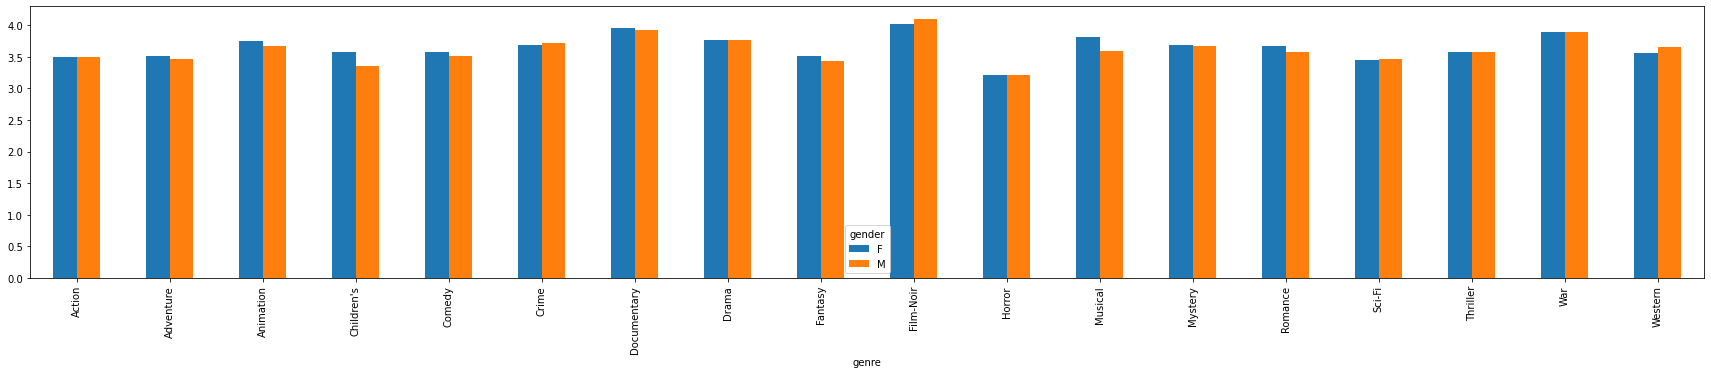

In [ ]:
genre_gender_ratings.plot(figsize=(30,5),kind = 'bar')

We have seen the plot showing that Film-Noir still holds the most liked genre among other genres. We can see that no matter the age or gender, Film-Noir is still the most preferred, especially by males. The lowest is also held by Horror, like we saw in ages.

This means that gender and age does interdependent on each other about films, because both show the same results in genre. Both agree that Film-Noir is the best genre. The second is held by Documentary. From here, we see people tend to like Noir films probably because of the style and Noir usually brings thrill to the vibe.

Now, we want to see the relation between gender and the genre `Drama`. We start by defining the rating with the dataset and `.loc` to locate the movies with `Drama` genre.

In [ ]:
drama_gender_ratings = ratings_with_genre.loc[ratings_with_genre.genre == 'Drama']
drama_gender_ratings

,movie_id,title,genre,user_id,rating,timestamp,gender,age,occupation,zip
7,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
12,527,Schindler's List (1993),Drama,1,5,978824195,F,1,10,48067
15,531,"Secret Garden, The (1993)",Drama,1,4,978302149,F,1,10,48067
27,608,Fargo (1996),Drama,1,4,978301398,F,1,10,48067
43,919,"Wizard of Oz, The (1939)",Drama,1,4,978301368,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...
2101796,3317,Wonder Boys (2000),Drama,5727,4,958489879,M,25,4,92843
2101797,3408,Erin Brockovich (2000),Drama,5727,5,958489879,M,25,4,92843
2101798,3409,Final Destination (2000),Drama,5727,4,958490143,M,25,4,92843
2101804,3513,Rules of Engagement (2000),Drama,5727,4,958489970,M,25,4,92843


After that, we make count each of the genders who watches drama. We use `.groupby()` and specify it to `gender` and `.count()`.

In [ ]:
drama_gender_ratings.groupby(['gender']).genre.count()

gender
F     98153
M    256376
Name: genre, dtype: int64

The result shows surprisingly that males watch drama more than females.

Now, we want to see the ages that watches drama to know which age who watch drama the most.

In [ ]:
drama_gender_ratings.groupby(['age']).genre.count()

age
1       7483
18     58104
25    138695
35     71590
45     32141
50     29247
56     17269
Name: genre, dtype: int64

THe result says that 25 year-olds watch the most drama, followed by 35 year-olds. The least is held by 1 year-olds.

Now, we want to see the ratings that is given to the genre.

In [ ]:
drama_gender_ratings.groupby(['rating']).genre.count()

rating
1     12114
2     29154
3     84821
4    131811
5     96629
Name: genre, dtype: int64

The result states that most ratings given to the genre is 4, followed by 5. The least ratings is 1.

From the comparison we made, we can see that the gender who watches drama most is males, the most age who do as well is 25, and the ratings given are 4. We can interpret that 25 year-old males likes to watch drama and tend to like them may it be from the storyline, vibe, actors, and ,many other factors or they just simply learning to be romantic.